In [2]:
!pip -q install langchain-groq duckduckgo-search
!pip -q install -U langchain_community tiktoken langchainhub
!pip -q install -U langchain langgraph tavily-python



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install langchain langgraph cassio

%pip install -U langchain_community tiktoken langchain-groq langchainhub chromadb langchain langgraph 

% pip install langchain_huggingface



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached chromadb-0.6.3-py3-none-any.whl (611 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.31.1-py3-none-any.whl (18 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.52b1-py3-none-any.whl (12 kB)
  Using cached opentelemetry_sdk-1.31.1-py3-none-any.whl (118 kB)
  Using cached opentelemetry_instrumentation_asgi-0.52b1-py3-none-any.whl (16 kB)
  Using cached opentelemetry_instrumentation-0.52b1-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Shashwat\\Desktop\\Capstone 2\\env\\Lib\\site-packages\\chromadb\\test\\api\\test_collection.py'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
UsageError: Line magic function `%` not found.


In [11]:
!pip install faiss-cpu

     --------------------------------------- 13.7/13.7 MB 20.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Langraph
#### 3 Agents
- Orchestrator
- Narrative 
- Credit note

#### Tools
- Web
- Stocks
- Vector Search

In [12]:
import os
from dotenv import load_dotenv
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

load_dotenv()  # Load env variables from .env file

api_key = os.environ.get("GROQ_API_KEY")

In [23]:

from langchain.text_splitter import RecursiveCharacterTextSplitter 
from langchain_community.document_loaders import WebBaseLoader
# Docs to index
urls=[
"https://lilianweng.github.io/posts/2023-06-23-agent/",
"https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/", "https://lilianweng.github.io/posts/2023-10-25-adv-attack-11m/",
]
# Load documents from the web
docs=[WebBaseLoader (url).load() for url in urls]
doc_list=[item for sublist in docs for item in sublist] # Flattening the list
# Splitting documents into smaller chunks
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder (chunk_size=500, chunk_overlap=0)
docs_split = text_splitter.split_documents (doc_list)

In [24]:

from langchain_huggingface import HuggingFaceEmbeddings
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
# Generate embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
# Store embeddings in Cassandra
index = faiss.IndexFlatL2(len(embeddings.embed_query("hello world")))

faiss_vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)
# Insert embeddings into the vector store 
faiss_vector_store.add_documents(docs_split)
print("Inserted %i headlines." % len(docs_split))

Inserted 52 headlines.


In [4]:

# from langchain.indexes.vectorstore import VectorStoreIndexwrapper

# faiss_vector_index = VectorStoreIndexwrapper(vectorstore = faiss_vector_store)

In [25]:

retriever = faiss_vector_store.as_retriever()
retriever.invoke("what is agent", ConsistencyLevel="LOCAL_ONE")

[Document(id='0c752e0f-29bc-46f6-8259-56c1ab6d3c15', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, 

In [10]:

from typing import Literal
from langchain_core.pydantic_v1 import BaseModel, Field

class RouteQuery (BaseModel):
    """Route a user query to the most relevant output."""

    datasource: Literal["credit_narrative", "credit_note"] = Field(
        ...,
    description="Given a user question choose to route it to Credit Narrative or a Credit Note.",
)

c:\Users\Shashwat\Desktop\Capstone 2\env\Lib\site-packages\IPython\core\interactiveshell.py:3549: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key = api_key, model="llama-3.3-70b-versatile",
)
structured_llm_router = llm.with_structured_output(RouteQuery)

In [15]:

from langchain_core.prompts import ChatPromptTemplate
system = """You are an expert at routing a user question to a credit narrative or credit note.
The user would typicall ask for either a credit narrative or a credit note to be generated.
If the user asks for a credit narrative to be generated use credit_narrative. Otherwise, use credit_note."""

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]

)
question_router = route_prompt | structured_llm_router

In [16]:
print(
question_router.invoke(
    {"question": "Generate me a credit narrative for the company Ola Electrical"}
    )
)

print(question_router.invoke({"question": "Draft a credit note to issue a loan for Ola Electrical"}))

datasource='credit_narrative'
datasource='credit_note'


In [17]:
## Web Search

#Duckduckgo
from langchain_community.tools import DuckDuckGoSearchRun

duckducksearch_tool = DuckDuckGoSearchRun()


# Tavily
# import os
# os.environ['TAVILY_API_KEY'] = "<Your Tavily API Key here>"
# from langchain_core.tools import tool
# from langchain_community.tools.tavily_search import TavilySearchResults
# tavily_tool = TavilySearchResults(max_results=5)



In [18]:
## Stock Data

# import getpass
# import os

# if "POLYGON_API_KEY" not in os.environ:
#     os.environ["POLYGON_API_KEY"] = getpass.getpass()

# from langchain_community.agent_toolkits.polygon.toolkit import PolygonToolkit
# from langchain_community.utilities.polygon import PolygonAPIWrapper

# from langchain import hub
# from langchain.agents import AgentExecutor, create_openai_functions_agent

# polygon = PolygonAPIWrapper()
# toolkit = PolygonToolkit.from_polygon_api_wrapper(polygon)

# toolkit.get_tools()


# instructions = """You are an assistant."""
# base_prompt = hub.pull("langchain-ai/openai-functions-template")
# prompt = base_prompt.partial(instructions=instructions)

# agent = create_openai_functions_agent(llm, toolkit.get_tools(), prompt)

# agent_executor = AgentExecutor(
#     agent=agent,
#     tools=toolkit.get_tools(),
#     verbose=True,
# )

from langchain.agents import AgentType, initialize_agent
from langchain_community.tools.yahoo_finance_news import YahooFinanceNewsTool
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(temperature=0.0)
tools = [YahooFinanceNewsTool()]
agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [ ]:
# agent_executor.invoke({"input": "What is the recent new regarding MSFT?"})

In [ ]:
from langchain.schema import Document
from typing import List, Dict, Any

def narrative_gen(state):
    """
    Generate a comprehensive credit narrative by querying multiple data sources:
    1. Vector database for relevant internal documents
    2. Web search for current market information
    3. Stock data for financial metrics when relevant
    
    Args:
        state (dict): The current graph state containing at minimum a "question" key
        
    Returns:
        dict: Enhanced state with added keys for retrieved information and the final narrative
    """
    print("---CREDIT NARRATIVE GENERATION---")
    question = state["question"]
    narrative_data = {}
    
    # 1. Vector DB Retrieval - Get internal documents
    try:
        print("Retrieving internal documents...")
        vector_docs = retriever.invoke(question, ConsistencyLevel="LOCAL_ONE")
        narrative_data["internal_documents"] = vector_docs
    except Exception as e:
        print(f"Vector retrieval error: {e}")
        narrative_data["internal_documents"] = []
    
    # 2. Web Search - Get current market information
    try:
        print("Performing web search...")
        web_results = duckducksearch_tool.run(f"credit market {question}")
        narrative_data["web_information"] = web_results
    except Exception as e:
        print(f"Web search error: {e}")
        narrative_data["web_information"] = "No web information retrieved."
    
    # 3. Stock Data - Get financial metrics when applicable
    try:
        print("Fetching financial data...")
        # Extract potential company names or tickers from the question
        # This is simplified - you might need more sophisticated entity extraction
        words = question.split()
        potential_tickers = [word.upper() for word in words if word.isalpha() and len(word) <= 5]
        
        stock_data = {}
        if potential_tickers:
            for ticker in potential_tickers[:3]:  # Limit to first 3 potential tickers
                try:
                    # Using the agent executor to get comprehensive stock information
                    stock_result = agent_chain.invoke({
                        "input": f"Get latest financial metrics and credit indicators for {ticker}"
                    })
                    stock_data[ticker] = stock_result["output"]
                except:
                    continue
        narrative_data["financial_metrics"] = stock_data
    except Exception as e:
        print(f"Stock data retrieval error: {e}")
        narrative_data["financial_metrics"] = {}
    
    # Generate the comprehensive narrative by combining all sources
    print("Generating comprehensive credit narrative...")
    
    # Format the combined data for the narrative generation
    combined_context = f"""
    INTERNAL KNOWLEDGE BASE INFORMATION:
    {format_documents(narrative_data.get('internal_documents', []))}
    
    CURRENT MARKET INFORMATION:
    {narrative_data.get('web_information', 'No current market information available.')}
    
    FINANCIAL METRICS AND INDICATORS:
    {format_financial_data(narrative_data.get('financial_metrics', {}))}
    """
    # print(question)
    # print(combined_context)
    
    # Use the LLM to generate the final narrative
    narrative = llm.invoke(f"""
    Based on the following information, generate a comprehensive credit narrative addressing this question:
    "{question}"
    
    INFORMATION SOURCES:
    {combined_context}
    
    Provide a well-structured credit narrative that integrates all relevant information from the sources above.
    """)
    
    # Return enhanced state
    return {
        "documents": narrative_data.get('internal_documents', []),
        "web_information": narrative_data.get('web_information', ""),
        "financial_metrics": narrative_data.get('financial_metrics', {}),
        "question": question,
        "narrative": narrative
    }

def format_documents(docs: List[Document]) -> str:
    """Format retrieved documents into a readable string"""
    if not docs:
        return "No internal documents found."
    
    formatted = []
    for i, doc in enumerate(docs):
        content = doc.page_content if hasattr(doc, 'page_content') else str(doc)
        formatted.append(f"Document {i+1}:\n{content}\n")
    
    return "\n".join(formatted)

def format_financial_data(financial_data: Dict[str, Any]) -> str:
    """Format financial metrics data into a readable string"""
    if not financial_data:
        return "No relevant financial metrics found."
    
    formatted = []
    for ticker, data in financial_data.items():
        formatted.append(f"Financial data for {ticker}:\n{data}\n")
    
    return "\n".join(formatted)

In [3]:
def note_gen(state):
    """
    wiki search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---wikipedia---")
    print("---HELLO--")

    question = state["question"]
    print(question)

    # Wiki search
    # docs = wiki.invoke({"query": question})
    #print(docs["summary"])
    wiki_results = docs
    wiki_results = Document(page_content=wiki_results)

    return {"documents": wiki_results, "question": question}

In [4]:
def route_question(state):
    """
    Route question to credit narrative or credit tool.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})
    if source.datasource == "credit_narrative":
        print("---ROUTE QUESTION TO credit narrative---")
        return "credit_narrative"
    elif source.datasource == "credit_tool":
        print("---ROUTE QUESTION TO credit_tool---")
        return "credit_tool"

In [5]:
from langgraph.graph import END, START, StateGraph

class GraphState:
    def __init__(self, input_data):
        self.input_data = input_data  # Store input data for workflow
        self.result = None  # Store final output

    def update_result(self, result):
        self.result = result


workflow = StateGraph(dict)

# Define nodes
workflow.add_node("credit_narrative", narrative_gen)
workflow.add_node("credit_tool", note_gen)

# Build graph with routing logic
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "credit_narrative": "credit_narrative",  
        "credit_tool": "credit_tool" 
    }
)

# Fix the node names in edges
workflow.add_edge("credit_narrative", END)
workflow.add_edge("credit_tool", END)


# Compile the graph
app = workflow.compile()

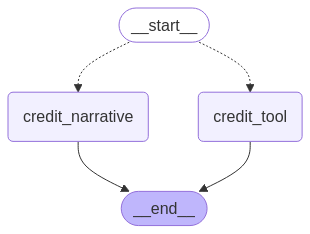

In [6]:

# Display graph

from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))

except Exception:
# This requires some extra dependencies and is optional pass
    print("Error")
    pass

In [29]:
from pprint import pprint
# Run
input_data = {
"question": "Generate me a credit narrative for a corporate loan for Apple"
}
for output in app.stream(input_data):
    for key, value in output.items():
    # Node
        pprint(f"Node '{key}':")
    # Optional: print full state at each node
    # pprint.pprint(value["keys"], indent-2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
print(value)
pprint(value['documents'])

---ROUTE QUESTION---
---ROUTE QUESTION TO credit narrative---
---CREDIT NARRATIVE GENERATION---
Retrieving internal documents...
Performing web search...
Fetching financial data...


> Entering new AgentExecutor chain...
To get the latest financial metrics and credit indicators for a company, I need to access its financial news and data. 

Action: yahoo_finance_news
Action Input: ME (assuming 'ME' is the ticker symbol for the company in question)

> Entering new AgentExecutor chain...
To get the latest financial metrics and credit indicators for a company, I need to find a reliable source of financial news and data. 

Action: yahoo_finance_news
Action Input: A

> Entering new AgentExecutor chain...
To find the latest financial metrics and credit indicators for a company with the ticker FOR, I should first look for financial news and data related to this company.

Action: yahoo_finance_news
Action Input: FORGenerating comprehensive credit narrative...
"Node 'credit_narrative':"
'\n---\n

In [ ]:
import json
from langchain_core.messages import (
    AIMessage,
    BaseMessage,
    ChatMessage,
    FunctionMessage,
    HumanMessage,
)
from langchain.tools.render import format_tool_to_openai_function
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph
from langgraph.prebuilt.tool_executor import ToolExecutor, ToolInvocation

In [ ]:
# duckduckgo
from langchain_community.tools import DuckDuckGoSearchRun

duckducksearch_tool = DuckDuckGoSearchRun()

# duckducksearch_tool.invoke("Obama's first name?")

'Jimmy, the first president to use his nickname in an official capacity, rather than his first name James. [195] Jimmy Cardigan, got the nickname after he wore a sweater instead of a suit one day [18] The Peanut Farmer, [196] he owned a peanut farm and fostered this image in his early campaigns, as a contrast to elite Washington insiders. The White House, official residence of the president of the United States, in July 2008. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of ... President John F. Kennedy, codename "Lancer" with First Lady Jacqueline Kennedy, codename "Lace". The United States Secret Service uses code names for U.S. presidents, first ladies, and other prominent persons and locations. [1] The use of such names was orig

In [ ]:
1. narrative_gen
2. note_gen

In [ ]:
tools = [duckducksearch_tool, python_repl]

In [ ]:
import operator
from typing import Annotated, List, Sequence, Tuple, TypedDict, Union
from langchain.agents import create_openai_functions_agent
from langchain.tools.render import format_tool_to_openai_function
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
# This defines the object that is passed between each node
# in the graph. We will create different nodes for each agent and tool
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sender: str

In [ ]:
tool_executor = ToolExecutor(tools)
def tool_node(state):
    """This runs tools in the graph
    It takes in an agent action and calls that tool and returns the result."""
    messages = state["messages"]
    # Based on the continue condition
    # we know the last message involves a function call
    last_message = messages[-1]
    # We construct an ToolInvocation from the function_call
    tool_input = json.loads(
        last_message.additional_kwargs["function_call"]["arguments"]
    )
    # We can pass single-arg inputs by value
    if len(tool_input) == 1 and "__arg1" in tool_input:
        tool_input = next(iter(tool_input.values()))
    tool_name = last_message.additional_kwargs["function_call"]["name"]
    action = ToolInvocation(
        tool=tool_name,
        tool_input=tool_input,
    )
    # We call the tool_executor and get back a response
    response = tool_executor.invoke(action)
    # We use the response to create a FunctionMessage
    function_message = FunctionMessage(
        content=f"{tool_name} response: {str(response)}", name=action.tool
    )
    # We return a list, because this will get added to the existing list
    return {"messages": [function_message]}

In [ ]:
# Either agent can decide to end
def router(state):
    # This is the router
    messages = state["messages"]
    last_message = messages[-1]
    if "function_call" in last_message.additional_kwargs:
        # The previus agent is invoking a tool
        return "call_tool"
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return "end"
    return "continue"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama3.3-8b-8192",
)

In [ ]:
import json
from langchain_core.messages import (
    AIMessage,
    BaseMessage,
    ChatMessage,
    FunctionMessage,
    HumanMessage,
)
from langchain_core.utils.function_calling import convert_to_openai_function
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph
from langgraph.prebuilt.tool_executor import ToolExecutor, ToolInvocation
def create_agent(llm, tools, system_message: str):
    """Create an agent."""
    functions = [convert_to_openai_function(t) for t in tools]
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You are a helpful AI assistant, collaborating with other assistants."
                " Use the provided tools to progress towards answering the question."
                " If you are unable to fully answer, that's OK, another assistant with different tools "
                " will help where you left off. Execute what you can to make progress."
                " If you or any of the other assistants have the final answer or deliverable,"
                " prefix your response with FINAL ANSWER so the team knows to stop."
                " You have access to the following tools: {tool_names}.\\\\n{system_message}",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    prompt = prompt.partial(system_message=system_message)
    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_functions(functions)

In [ ]:
# Helper function to create a node for a given agent
def agent_node(state, agent, name):
    result = agent.invoke(state)
    # We convert the agent output into a format that is suitable to append to the global state
    if isinstance(result, FunctionMessage):
        pass
    else:
        result = HumanMessage(**result.dict(exclude={"type", "name"}), name=name)
    return {
        "messages": [result],
        # Since we have a strict workflow, we can
        # track the sender so we know who to pass to next.
        "sender": name,
    }

In [ ]:
research_agent= create_agent(
    llm,
    [duckducksearch_tool],
    system_message="You should provide accurate data for the chart generator to use.",
)
vectordb_agent= create_agent(
    llm,
    [vectordb_search_tool],
    system_message="Any charts you display will be visible by the user.",
)

In [ ]:
# Tavily
import os
os.environ['TAVILY_API_KEY'] = "<Your Tavily API Key here>"
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_tool = TavilySearchResults(max_results=5)

In [ ]:
class AgentState(TypedDict):
    """The state of the agent."""
    messages: Annotated[Sequence[BaseMessage], add_messages]

def create_agent(llm, tools):
    llm_with_tools = llm.bind_tools(tools)
    def chatbot(state: AgentState):
        return {"messages": [llm_with_tools.invoke(state["messages"])]}

    graph_builder = StateGraph(AgentState)
    graph_builder.add_node("agent", chatbot)

    tool_node = ToolNode(tools=tools)
    graph_builder.add_node("tools", tool_node)

    graph_builder.add_conditional_edges(
        "agent",
        tools_condition,
    )
    graph_builder.add_edge("tools", "agent")
    graph_builder.set_entry_point("agent")
    return graph_builder.compile()


In [9]:
narrative_generation_agent = create_agent(GROQ_LLM, [web_search_tool])

def web_research_node(state: MessagesState) -> Command[Literal["supervisor"]]:
    result = narrative_generation_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="web_researcher")
            ]
        },
        goto="supervisor",
    )


NameError: name 'create_agent' is not defined

In [8]:
class VectorStore(BaseModel):
    (
         "A vectorstore contains information about food recipes"
        ", ingredients used and cooking procedure"
    )

    query: str

router_prompt_template = (
    "You are an expert in routing user queries to a VectorStore\n"
    "The VectorStore contains information on food recipes.\n"
    'Note that if a query is not recipe related, you must output "not food related", don\'t try to use any tool.\n\n'
    "query: {query}"
)

llm = ChatGroq(model="llama-3.1-70b-versatile", temperature=0)
prompt = ChatPromptTemplate.from_template(router_prompt_template)
question_router = prompt | llm.bind_tools(tools=[VectorStore])

NameError: name 'BaseModel' is not defined